In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income_cleaned = pd.read_csv('income_cleaned.csv')
income_cleaned.head()

Unnamed: 0  age  workclass     education  educational-num  \
0           0   25    Private          11th                7   
1           1   38    Private       HS-grad                9   
2           2   28  Local-gov    Assoc-acdm               12   
3           3   44    Private  Some-college               10   
4           5   34    Private          10th                6   

       marital-status         occupation   relationship   race gender  \
0       Never-married  Machine-op-inspct      Own-child  Black   Male   
1  Married-civ-spouse    Farming-fishing        Husband  White   Male   
2  Married-civ-spouse    Protective-serv        Husband  White   Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black   Male   
4       Never-married      Other-service  Not-in-family  White   Male   

   hours-per-week  Income_Above_or_Below_50K  
0              40                          0  
1              50                          0  
2              40                          1  
3              40                          1  
4              30                          0

<h3>Preprocessing</h3>

In [3]:
#Unnamed: 0 and educational-num are not useful for this analysis, so they will be dropped.
income_cleaned = income_cleaned.drop(['Unnamed: 0', 'educational-num'],axis=1)

In [4]:
#Use one-hot encoding on the categorical columns
one_hot_workclass = pd.get_dummies(income_cleaned['workclass'])
one_hot_education = pd.get_dummies(income_cleaned['education'])
one_hot_marital = pd.get_dummies(income_cleaned['marital-status'])
one_hot_occupation = pd.get_dummies(income_cleaned['occupation'])
one_hot_relationship = pd.get_dummies(income_cleaned['relationship'])
one_hot_race = pd.get_dummies(income_cleaned['race'])
one_hot_gender = pd.get_dummies(income_cleaned['gender'])

In [5]:
income1 = pd.concat([income_cleaned,one_hot_workclass,one_hot_education,one_hot_marital,one_hot_occupation,\
                     one_hot_relationship,one_hot_race,one_hot_gender],axis=1).drop(['workclass','education',\
                                                                                     'marital-status','occupation',\
                                                                                    'relationship','race','gender'],axis=1)

In [6]:
income1.head()

age  hours-per-week  Income_Above_or_Below_50K  Federal-gov  Local-gov  \
0   25              40                          0            0          0   
1   38              50                          0            0          0   
2   28              40                          1            0          1   
3   44              40                          1            0          0   
4   34              30                          0            0          0   

   Private  Self-emp-inc  Self-emp-not-inc  State-gov  Without-pay  ...  \
0        1             0                 0          0            0  ...   
1        1             0                 0          0            0  ...   
2        0             0                 0          0            0  ...   
3        1             0                 0          0            0  ...   
4        1             0                 0          0            0  ...   

   Own-child  Unmarried  Wife  Amer-Indian-Eskimo  Asian-Pac-Islander  Black  \
0          1          0     0                   0                   0      1   
1          0          0     0                   0                   0      0   
2          0          0     0                   0                   0      0   
3          0          0     0                   0                   0      1   
4          0          0     0                   0                   0      0   

   Other  White  Female  Male  
0      0      0       0     1  
1      0      1       0     1  
2      0      1       0     1  
3      0      0       0     1  
4      0      1       0     1  

[5 rows x 60 columns]

In [7]:
X = income1.drop(['Income_Above_or_Below_50K'],axis=1)
y = income1['Income_Above_or_Below_50K'].ravel() #use .ravel() to pass a 1d array instead of column vector

In [8]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

<h3>Modeling</h3>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_lr,X_test_lr,y_train_lr,y_test_lr = train_test_split(X_scaled,y,random_state=42)

<h3>Logistic Regression</h3>

In [10]:
from sklearn.model_selection import GridSearchCV

clf=LogisticRegression()
param_grid = {'C': [0.001, 0.1, 1, 10, 100]}

logreg_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
logreg_clf.fit(X_train_lr, y_train_lr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100]}, scoring='accuracy')

In [11]:
clf=LogisticRegression(C=logreg_clf.best_params_['C'])
clf.fit(X_train_lr, y_train_lr)
ypred_lr=clf.predict(X_test_lr)
accuracy_score(ypred_lr, y_test_lr)

0.8339819564832832

<h3>Decision Tree</h3>

In [12]:
from sklearn import tree, metrics
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [13]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train_dt, y_train_dt)
y_pred_dt_e = entr_model.predict(X_test_dt)
y_pred_dt_e = pd.Series(y_pred_dt_e)

In [14]:
print("Model Entropy model no max depth")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_dt_e),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_dt_e),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_dt_e),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_dt_e),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_dt_e),4))

Model Entropy model no max depth
Accuracy: 0.7891
Balanced accuracy: 0.7057
Precision: 0.5813
Recall: 0.5399
F-measure: 0.5598


In [15]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train_dt, y_train_dt)
y_pred_dt_g = gini_model.predict(X_test_dt)
y_pred_dt_g = pd.Series(y_pred_dt_g)

In [16]:
print("Model Gini impurity model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_dt_g),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_dt_g),4))
print('Precision:', round(metrics.precision_score(y_test_dt,y_pred_dt_g),4))
print('Recall:', round(metrics.recall_score(y_test_dt,y_pred_dt_g),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_dt_g),4))

Model Gini impurity model
Accuracy: 0.7869
Balanced accuracy: 0.7045
Precision: 0.5757
Recall: 0.5406
F-measure: 0.5576


<h3>Random Forest</h3>

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [18]:
RF = RandomForestClassifier(random_state = 1234, criterion = 'entropy')
RF.fit(X_train_dt, y_train_dt)
y_pred_rfe = RF.predict(X_test_dt)
y_pred_rfe = pd.Series(y_pred_rfe)

In [19]:
print("Random Forest Entropy model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_rfe),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_rfe),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_rfe),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_rfe),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_rfe),4))

Random Forest Entropy model
Accuracy: 0.8162
Balanced accuracy: 0.7314
Precision: 0.6501
Recall: 0.563
F-measure: 0.6034


In [20]:
RF = RandomForestClassifier(random_state = 1234, criterion = 'gini')
RF.fit(X_train_dt, y_train_dt)
y_pred_rfg = RF.predict(X_test_dt)
y_pred_rfg = pd.Series(y_pred_rfg)

In [21]:
print("Random Forest Gini model")
print("Accuracy:", round(metrics.accuracy_score(y_test_dt,y_pred_rfg),4))
print("Balanced accuracy:", round(metrics.balanced_accuracy_score(y_test_dt,y_pred_rfg),4))
print('Precision:' , round(metrics.precision_score(y_test_dt,y_pred_rfg),4))
print('Recall:' , round(metrics.recall_score(y_test_dt,y_pred_rfg),4))
print('F-measure:' , round(metrics.f1_score(y_test_dt,y_pred_rfg),4))

Random Forest Gini model
Accuracy: 0.8143
Balanced accuracy: 0.7277
Precision: 0.647
Recall: 0.5556
F-measure: 0.5978


The random forest entropy model has the highest precision (65%), recall (56.3%), and F-score (60.34%). The logistic regression model has the highest accuracy at 83.39%.

<h3>Feature Selection</h3>

In [22]:
best_feat = np.abs(income1.corr()['Income_Above_or_Below_50K'])
best_feat_corr = pd.DataFrame(best_feat[:-1]).sort_values('Income_Above_or_Below_50K',ascending=False)
best_feat_corr

Income_Above_or_Below_50K
Income_Above_or_Below_50K                   1.000000
Married-civ-spouse                          0.446192
Husband                                     0.403706
Never-married                               0.319536
age                                         0.237040
hours-per-week                              0.227199
Own-child                                   0.222635
Female                                      0.215760
Exec-managerial                             0.209176
Not-in-family                               0.195561
Prof-specialty                              0.183329
Bachelors                                   0.178594
Masters                                     0.172094
Other-service                               0.165428
Prof-school                                 0.155856
Unmarried                                   0.147262
Self-emp-inc                                0.137845
HS-grad                                     0.136249
Divorced                                    0.133982
Doctorate                                   0.124108
Wife                                        0.121396
Private                                     0.116721
Adm-clerical                                0.096389
Handlers-cleaners                           0.091692
Black                                       0.090405
11th                                        0.086078
Other-relative                              0.085604
White                                       0.083481
Machine-op-inspct                           0.076726
Separated                                   0.073853
10th                                        0.069813
Widowed                                     0.060443
Federal-gov                                 0.059174
Some-college                                0.057398
7th-8th                                     0.057080
Farming-fishing                             0.056077
9th                                         0.054675
5th-6th                                     0.046120
12th                                        0.045636
Priv-house-serv                             0.039071
Married-spouse-absent                       0.038624
1st-4th                                     0.034456
Local-gov                                   0.029731
Amer-Indian-Eskimo                          0.028762
Other                                       0.024727
Protective-serv                             0.022946
Transport-moving                            0.022306
Self-emp-not-inc                            0.021828
Preschool                                   0.021638
Craft-repair                                0.020658
Sales                                       0.018098
Tech-support                                0.017345
Asian-Pac-Islander                          0.014102
Married-AF-spouse                           0.011689
State-gov                                   0.009514
Without-pay                                 0.007618
Assoc-acdm                                  0.006991
Assoc-voc                                   0.004648
Armed-Forces                                0.001544

Text(0, 0.5, 'Features')

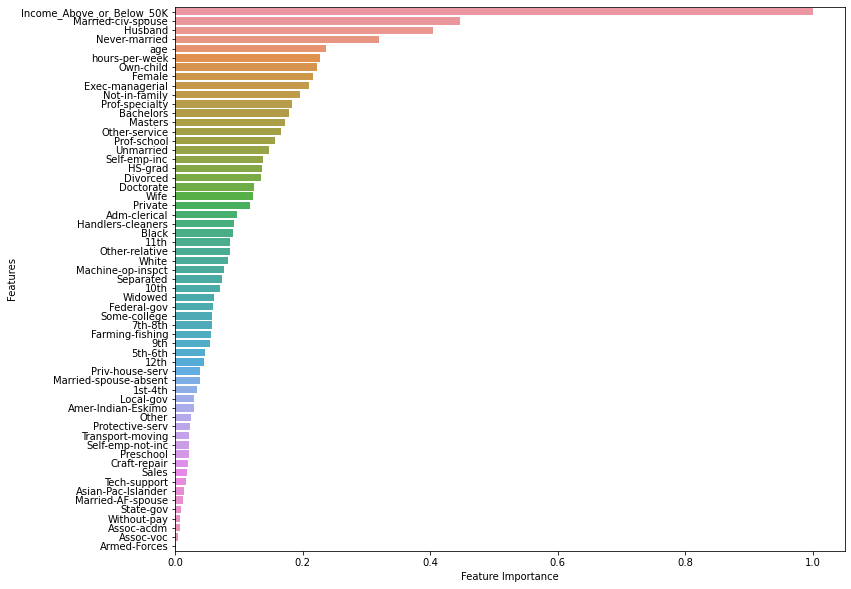

In [23]:
plt.figure(figsize=(12,10))
sns.barplot(x=best_feat_corr['Income_Above_or_Below_50K'], y=best_feat_corr.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

The factors most likely to determine that somebody has an income above 50000 are being married, being a husband, and never being married. Those that are never married likely have more time to put into their jobs and make more money. Married couples tend to have higher incomes because of their combined incomes. Husbands also tend to make more money than their wives.